In [15]:
from URSGeneClassifier import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import operator

In [16]:
X_train, X_test, y_train, y_test, X_full, y_full = load_and_format_training_data('alz/giant/saved_full_train.pkl')
scores = {}

In [25]:
scores_no_tuning = {}


5 fold cross validation scores:
[0.60869565 0.62055336 0.67460317 0.57936508 0.65079365]

5 fold cross validation score average:
0.6268021833239225

AUROC score:
0.636149646219845


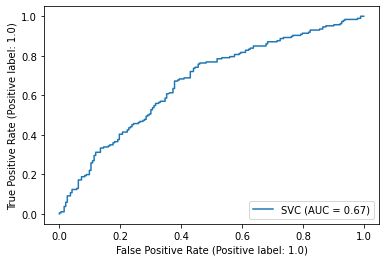

138 wrong out of 379
Accuracy: 0.6358839050131926


In [17]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)


5 fold cross validation scores:
[0.60869565 0.62055336 0.67460317 0.57936508 0.65079365]

5 fold cross validation score average:
0.6268021833239225

AUROC score:
0.636149646219845


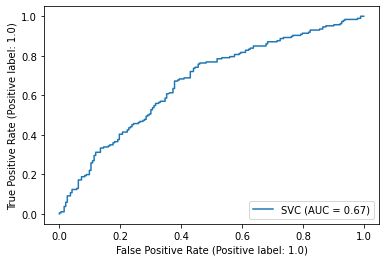

138 wrong out of 379
Accuracy: 0.6358839050131926


In [26]:
evaluate_model(svm_linear, X_full, y_full, X_test, y_test, scores_no_tuning)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

5 fold cross validation scores:
[0.61660079 0.66007905 0.69047619 0.59920635 0.66666667]

5 fold cross validation score average:
0.6466058096492879

AUROC score:
0.6524736754136721


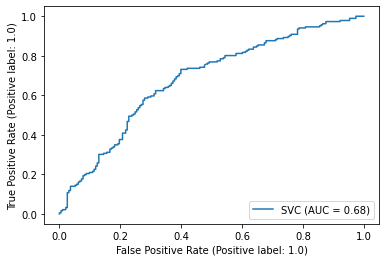

132 wrong out of 379
Accuracy: 0.6517150395778364


In [18]:
param_grid = [
  {'C': [1, 10, 100, 100 0], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

grid_svm_linear = GridSearchCV(svm_linear, param_grid, cv=5)
grid_svm_linear.fit(X_train, y_train)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

5 fold cross validation scores:
[0.61660079 0.66007905 0.69047619 0.59920635 0.66666667]

5 fold cross validation score average:
0.6466058096492879

AUROC score:
0.6524736754136721


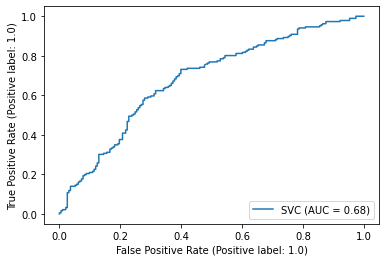

132 wrong out of 379
Accuracy: 0.6517150395778364


In [27]:
print(grid_svm_linear.best_params_)
evaluate_model(grid_svm_linear.best_estimator_, X_full, y_full, X_test, y_test, scores)


5 fold cross validation scores:
[0.62055336 0.68774704 0.67857143 0.66666667 0.67063492]

5 fold cross validation score average:
0.6648346822259865

AUROC score:
0.64465986963062


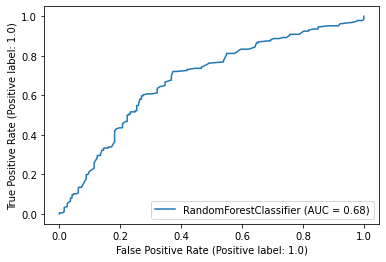

134 wrong out of 379
Accuracy: 0.6464379947229552


In [6]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)



5 fold cross validation scores:
[0.64822134 0.66798419 0.67857143 0.6468254  0.68253968]

5 fold cross validation score average:
0.6648284083066691

AUROC score:
0.64465986963062


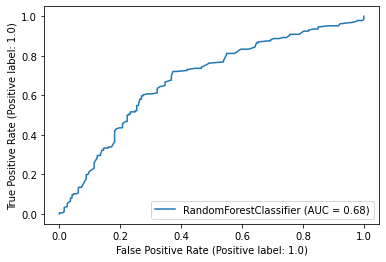

134 wrong out of 379
Accuracy: 0.6464379947229552


In [28]:
evaluate_model(rfc, X_full, y_full, X_test, y_test, scores_no_tuning)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}

5 fold cross validation scores:
[0.65217391 0.69565217 0.65873016 0.65873016 0.67857143]

5 fold cross validation score average:
0.6687715665976535

AUROC score:
0.6595632068638921


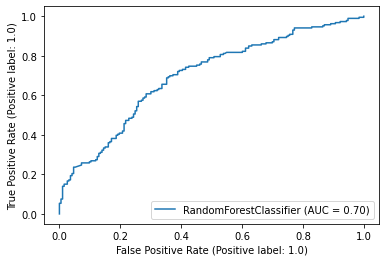

129 wrong out of 379
Accuracy: 0.6596306068601583


In [19]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_rfc = GridSearchCV(rfc, param_grid, cv=5)
grid_rfc.fit(X_train, y_train)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}

5 fold cross validation scores:
[0.65612648 0.67588933 0.66666667 0.65873016 0.65873016]

5 fold cross validation score average:
0.6632285588807327

AUROC score:
0.6595632068638921


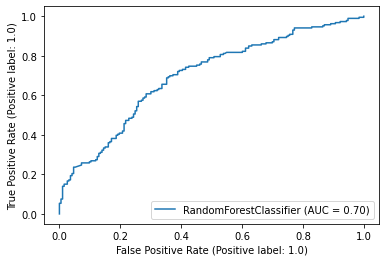

129 wrong out of 379
Accuracy: 0.6596306068601583


In [29]:
print(grid_rfc.best_params_)
evaluate_model(grid_rfc.best_estimator_, X_full, y_full, X_test, y_test, scores)


5 fold cross validation scores:
[0.57312253 0.58102767 0.6031746  0.59126984 0.61904762]

5 fold cross validation score average:
0.5935284522241044

AUROC score:
0.5627193715527328


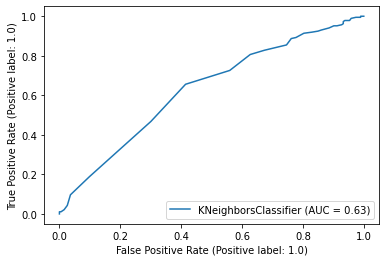

168 wrong out of 379
Accuracy: 0.5567282321899736


In [20]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)


5 fold cross validation scores:
[0.57312253 0.58102767 0.6031746  0.59126984 0.61904762]

5 fold cross validation score average:
0.5935284522241044

AUROC score:
0.5627193715527328


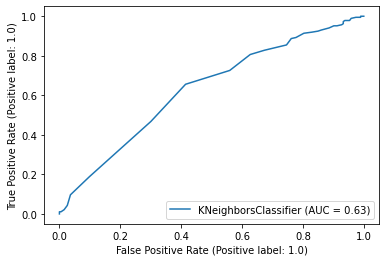

168 wrong out of 379
Accuracy: 0.5567282321899736


In [30]:
evaluate_model(knn, X_full, y_full, X_test, y_test, scores_no_tuning)

{'n_neighbors': 8}

5 fold cross validation scores:
[0.55731225 0.54940711 0.57936508 0.61111111 0.60714286]

5 fold cross validation score average:
0.5808676830415961

AUROC score:
0.585896150203354


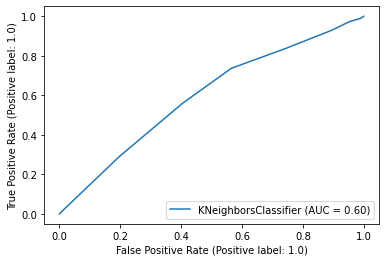

158 wrong out of 379
Accuracy: 0.58311345646438


In [21]:
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
grid_knn = GridSearchCV(knn, param_grid, cv=5)
grid_knn.fit(X_train, y_train)

{'n_neighbors': 8}

5 fold cross validation scores:
[0.55731225 0.54940711 0.57936508 0.61111111 0.60714286]

5 fold cross validation score average:
0.5808676830415961

AUROC score:
0.585896150203354


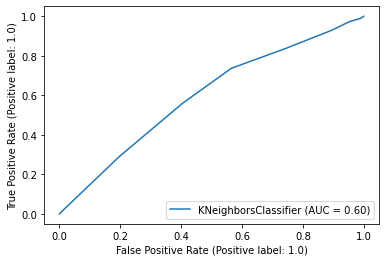

158 wrong out of 379
Accuracy: 0.58311345646438


In [31]:
print(grid_knn.best_params_)
evaluate_model(grid_knn.best_estimator_, X_full, y_full, X_test, y_test, scores)


5 fold cross validation scores:
[0.54940711 0.54940711 0.56349206 0.59126984 0.58333333]

5 fold cross validation score average:
0.56738189346885

AUROC score:
0.5746141846342414


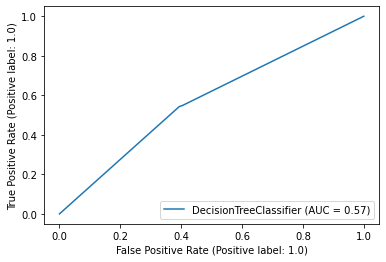

161 wrong out of 379
Accuracy: 0.575197889182058


In [8]:
dtc = DecisionTreeClassifier(max_depth=100)
dtc.fit(X_train, y_train)


5 fold cross validation scores:
[0.50988142 0.56126482 0.62301587 0.56746032 0.57142857]

5 fold cross validation score average:
0.56661020139281

AUROC score:
0.5746141846342414


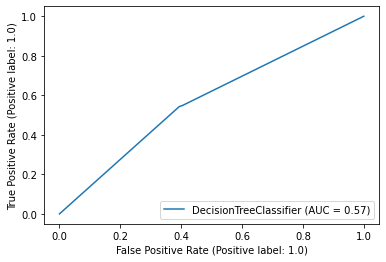

161 wrong out of 379
Accuracy: 0.575197889182058


In [32]:
evaluate_model(dtc, X_full, y_full, X_test, y_test, scores_no_tuning)

{'max_leaf_nodes': 3, 'min_samples_split': 2}

5 fold cross validation scores:
[0.58893281 0.62055336 0.59920635 0.62698413 0.62301587]

5 fold cross validation score average:
0.6117385030428509

AUROC score:
0.5686528497409327


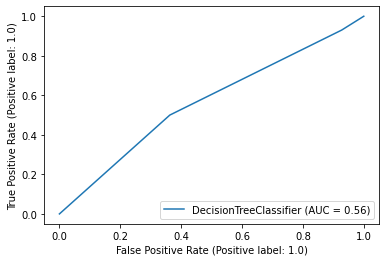

163 wrong out of 379
Accuracy: 0.5699208443271768


In [22]:
param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]}
grid_dtc = GridSearchCV(dtc, param_grid, cv=5)
grid_dtc.fit(X_train, y_train)

{'max_leaf_nodes': 3, 'min_samples_split': 2}

5 fold cross validation scores:
[0.58893281 0.62055336 0.59920635 0.62698413 0.62301587]

5 fold cross validation score average:
0.6117385030428509

AUROC score:
0.5686528497409327


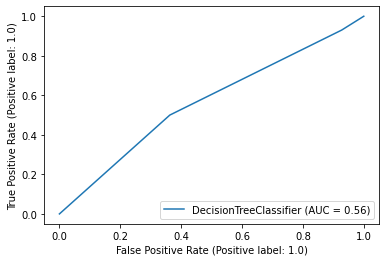

163 wrong out of 379
Accuracy: 0.5699208443271768


In [33]:
print(grid_dtc.best_params_)
evaluate_model(grid_dtc.best_estimator_, X_full, y_full, X_test, y_test, scores)


5 fold cross validation scores:
[0.64822134 0.64031621 0.70238095 0.60714286 0.71031746]

5 fold cross validation score average:
0.6616757638496769

AUROC score:
0.6457323527773134


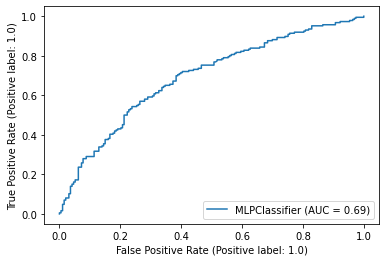

134 wrong out of 379
Accuracy: 0.6464379947229552


In [23]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)


5 fold cross validation scores:
[0.65612648 0.62450593 0.71428571 0.58333333 0.70634921]

5 fold cross validation score average:
0.6569201330070895

AUROC score:
0.6457323527773134


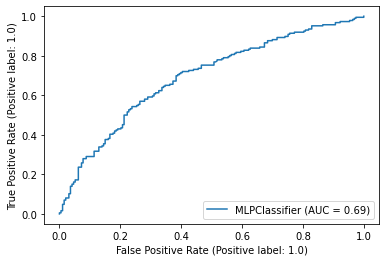

134 wrong out of 379
Accuracy: 0.6464379947229552

5 fold cross validation scores:
[0.65217391 0.66798419 0.70238095 0.59920635 0.71428571]

5 fold cross validation score average:
0.6672062237279628

AUROC score:
0.6457323527773134


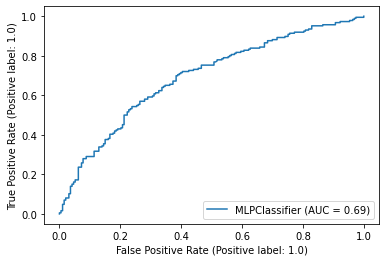

134 wrong out of 379
Accuracy: 0.6464379947229552


In [34]:
evaluate_model(mlp, X_full, y_full, X_test, y_test, scores)
evaluate_model(mlp, X_full, y_full, X_test, y_test, scores_no_tuning)

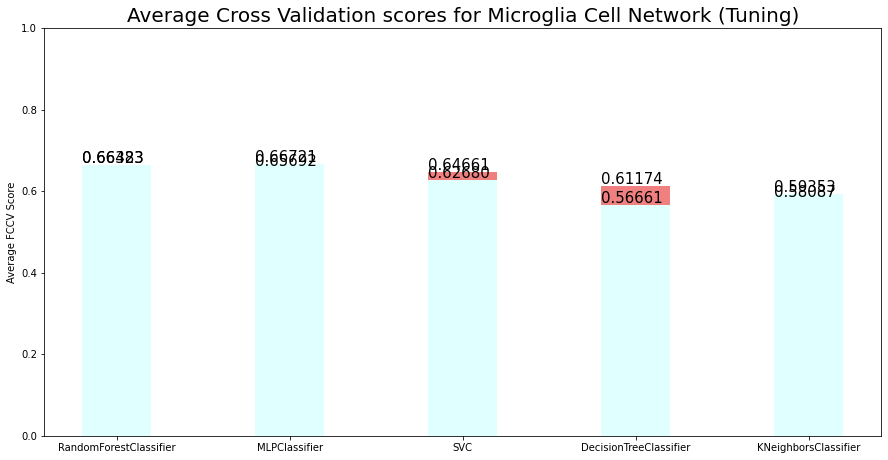

In [44]:
scores = dict(sorted(scores.items(), key=operator.itemgetter(1),reverse=True))
fig = plt.figure(figsize = (15, 7.5))

ax = plt.gca()
ax.set_ylim([0,1]) 
plt.ylabel('Average FCCV Score')
plt.title("Average Cross Validation scores for Microglia Cell Network (Tuning)", fontsize=20)
    
# creating the bar plot
bars1 = plt.bar(scores.keys(), scores.values(), color ='lightcoral',
        width = 0.4)
bars2 = plt.bar(scores_no_tuning.keys(), scores_no_tuning.values(), color ='lightcyan',
        width = 0.4)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, format(yval, '.5f'), fontsize=15)
    
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, format(yval, '.5f'), fontsize=15)

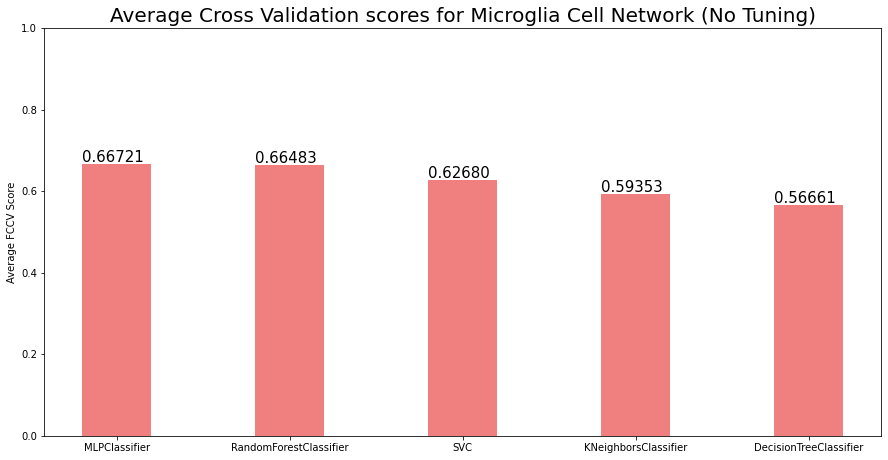

In [38]:
scores_no_tuning = dict(sorted(scores_no_tuning.items(), key=operator.itemgetter(1),reverse=True))
fig = plt.figure(figsize = (15, 7.5))

ax = plt.gca()
ax.set_ylim([0,1]) 
plt.ylabel('Average FCCV Score')
plt.title("Average Cross Validation scores for Microglia Cell Network (No Tuning)", fontsize=20)
 
# creating the bar plot
bars = plt.bar(scores_no_tuning.keys(), scores_no_tuning.values(), color ='lightcoral',
        width = 0.4)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, format(yval, '.5f'), fontsize=15)

In [13]:
# mlp = MLPRegressor(max_iter=1000)
# mlp.fit(X_train, y_train)
# evaluate_model(mlp, X_full, y_full, X_test, y_test)